In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import cufflinks as cf
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
# cf.go_offline()
%matplotlib inline

deliveries = pd.read_csv("IPL Cricsheet CS new/all_matches.csv")




C:\Users\Asus\anaconda3\envs\DataAnalysisEnv\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
deliveries.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [130]:
deliveries_2021 = deliveries[(deliveries['season'] == 2021) | (deliveries['season'] == '2021')]
deliveries_2021

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
193617,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.1,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,CA Lynn,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193618,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.2,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,CA Lynn,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193619,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.3,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,CA Lynn,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193620,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.4,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,CA Lynn,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193621,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.5,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,CA Lynn,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198725,1254078,2021,2021-04-26,"Narendra Modi Stadium, Ahmedabad",2,15.6,Kolkata Knight Riders,Punjab Kings,EJG Morgan,KD Karthik,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198726,1254078,2021,2021-04-26,"Narendra Modi Stadium, Ahmedabad",2,16.1,Kolkata Knight Riders,Punjab Kings,EJG Morgan,KD Karthik,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198727,1254078,2021,2021-04-26,"Narendra Modi Stadium, Ahmedabad",2,16.2,Kolkata Knight Riders,Punjab Kings,KD Karthik,EJG Morgan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198728,1254078,2021,2021-04-26,"Narendra Modi Stadium, Ahmedabad",2,16.3,Kolkata Knight Riders,Punjab Kings,KD Karthik,EJG Morgan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
deliveries_2021.venue.value_counts()

MA Chidambaram Stadium, Chepauk, Chennai    2461
Wankhede Stadium, Mumbai                    2427
Narendra Modi Stadium, Ahmedabad             225
Name: venue, dtype: int64

In [132]:
Chepauk_2021 = deliveries_2021[deliveries_2021['venue'] == 'MA Chidambaram Stadium, Chepauk, Chennai']
Wankhede_2021 = deliveries_2021[deliveries_2021['venue'] == 'Wankhede Stadium, Mumbai']

In [133]:
import math

In [140]:
Chepauk_2021['Over Number'] = (Chepauk_2021['ball'] // 1) + 1
Chepauk_2021['Ball Number'] = round(((Chepauk_2021['ball']) % 1) * 10)
Chepauk_2021 = Chepauk_2021.astype({"Over Number": int, "Ball Number": int})
Chepauk_2021 = Chepauk_2021.head(2449)

In [135]:
Wankhede_2021['Over Number'] = (Wankhede_2021['ball'] // 1) + 1
Wankhede_2021['Ball Number'] = round(((Wankhede_2021['ball']) % 1) * 10)
Wankhede_2021 = Wankhede_2021.astype({"Over Number": int, "Ball Number": int})
Wankhede_2021

<ipython-input-135-81869608ef92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wankhede_2021['Over Number'] = (Wankhede_2021['ball'] // 1) + 1
<ipython-input-135-81869608ef92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wankhede_2021['Ball Number'] = round(((Wankhede_2021['ball']) % 1) * 10)


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,Over Number,Ball Number
193867,1254059,2021,2021-04-10,"Wankhede Stadium, Mumbai",1,0.1,Chennai Super Kings,Delhi Capitals,RD Gaikwad,F du Plessis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
193868,1254059,2021,2021-04-10,"Wankhede Stadium, Mumbai",1,0.2,Chennai Super Kings,Delhi Capitals,RD Gaikwad,F du Plessis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2
193869,1254059,2021,2021-04-10,"Wankhede Stadium, Mumbai",1,0.3,Chennai Super Kings,Delhi Capitals,RD Gaikwad,F du Plessis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3
193870,1254059,2021,2021-04-10,"Wankhede Stadium, Mumbai",1,0.4,Chennai Super Kings,Delhi Capitals,RD Gaikwad,F du Plessis,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,4
193871,1254059,2021,2021-04-10,"Wankhede Stadium, Mumbai",1,0.5,Chennai Super Kings,Delhi Capitals,F du Plessis,RD Gaikwad,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198240,1254076,2021,2021-04-25,"Wankhede Stadium, Mumbai",2,19.2,Royal Challengers Bangalore,Chennai Super Kings,Mohammed Siraj,YS Chahal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,2
198241,1254076,2021,2021-04-25,"Wankhede Stadium, Mumbai",2,19.3,Royal Challengers Bangalore,Chennai Super Kings,Mohammed Siraj,YS Chahal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,3
198242,1254076,2021,2021-04-25,"Wankhede Stadium, Mumbai",2,19.4,Royal Challengers Bangalore,Chennai Super Kings,Mohammed Siraj,YS Chahal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,4
198243,1254076,2021,2021-04-25,"Wankhede Stadium, Mumbai",2,19.5,Royal Challengers Bangalore,Chennai Super Kings,YS Chahal,Mohammed Siraj,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,5


In [141]:
Chepauk_2021['isDot'] = Chepauk_2021['runs_off_bat'].apply(lambda x: 1 if x==0 else 0)
Chepauk_2021['isOne'] = Chepauk_2021['runs_off_bat'].apply(lambda x: 1 if x==1 else 0)
Chepauk_2021['isFour'] = Chepauk_2021['runs_off_bat'].apply(lambda x: 1 if x==4 else 0)
Chepauk_2021['isSix'] = Chepauk_2021['runs_off_bat'].apply(lambda x: 1 if x==6 else 0)
Chepauk_2021['isBoundary'] = Chepauk_2021['runs_off_bat'].apply(lambda x:1 if (x==4 or x==6) else 0)


In [142]:
Wankhede_2021['isDot'] = Wankhede_2021['runs_off_bat'].apply(lambda x: 1 if x==0 else 0)
Wankhede_2021['isOne'] = Wankhede_2021['runs_off_bat'].apply(lambda x: 1 if x==1 else 0)
Wankhede_2021['isFour'] = Wankhede_2021['runs_off_bat'].apply(lambda x: 1 if x==4 else 0)
Wankhede_2021['isSix'] = Wankhede_2021['runs_off_bat'].apply(lambda x: 1 if x==6 else 0)
Wankhede_2021['isBoundary'] = Wankhede_2021['runs_off_bat'].apply(lambda x:1 if (x==4 or x==6) else 0)


In [267]:
runs = pd.DataFrame(Chepauk_2021.groupby('striker').sum()['runs_off_bat'])
balls = pd.DataFrame(Chepauk_2021.groupby('striker').count()['ball'])
wides = pd.DataFrame(Chepauk_2021.groupby('striker').count()['wides'])
dots = pd.DataFrame(Chepauk_2021.groupby('striker').sum()['isDot'])
fours = pd.DataFrame(Chepauk_2021.groupby('striker').sum()['isFour'])
sixes = pd.DataFrame(Chepauk_2021.groupby('striker').sum()['isSix'])
boundaries = pd.DataFrame(Chepauk_2021.groupby('striker').sum()['isBoundary'])
# dismissals = pd.DataFrame(Chepauk_2021['player_dismissed'].value_counts())

In [268]:
innings = pd.DataFrame(Chepauk_2021.groupby('striker').agg({'match_id': 'nunique'}))
innings

,match_id
striker,
AB de Villiers,3
AD Russell,3
Abdul Samad,3
Abhishek Sharma,2
Arshdeep Singh,1
...,...
V Kohli,3
V Shankar,4
Virat Singh,2


In [269]:
batsmen_in_Chepauk_2021 = runs.merge(balls, on='striker')
batsmen_in_Chepauk_2021 = batsmen_in_Chepauk_2021.merge(wides, on='striker')
batsmen_in_Chepauk_2021 = batsmen_in_Chepauk_2021.merge(dots, on='striker')
batsmen_in_Chepauk_2021 = batsmen_in_Chepauk_2021.merge(fours, on='striker')
batsmen_in_Chepauk_2021 = batsmen_in_Chepauk_2021.merge(sixes, on='striker')
batsmen_in_Chepauk_2021 = batsmen_in_Chepauk_2021.merge(boundaries, on='striker')
batsmen_in_Chepauk_2021['ball'] = batsmen_in_Chepauk_2021['ball'] - batsmen_in_Chepauk_2021['wides']
batsmen_in_Chepauk_2021.drop('wides', axis=1, inplace=True)
batsmen_in_Chepauk_2021.columns = ['Runs', 'Balls', 'Dots', 'Fours', 'Sixes', 'Boundaries']

batsmen_in_Chepauk_2021

,Runs,Balls,Dots,Fours,Sixes,Boundaries
striker,,,,,,
AB de Villiers,125,66,16,13,5,18
AD Russell,45,40,22,5,2,7
Abdul Samad,26,18,7,1,2,3
Abhishek Sharma,7,10,6,0,0,0
Arshdeep Singh,1,2,1,0,0,0
...,...,...,...,...,...,...
V Kohli,71,64,26,9,0,9
V Shankar,50,44,17,0,3,3
Virat Singh,15,26,14,1,0,1


In [270]:
dismissals = pd.DataFrame(Chepauk_2021['player_dismissed'].value_counts())
dismissals.index.names = ['striker']
zero_dismissals = (set(Chepauk_2021.striker.unique()) - set(dismissals.index))
zero_dismissals
zero_dismissals_dict = dict()
zero_dismissals_dict['striker'] = list(zero_dismissals)
zero_dismissals_dict['player_dismissed'] = 0
zero_dismissals_dict
zero_dismissals_dict = pd.DataFrame(zero_dismissals_dict)
zero_dismissals_dict
zero_dismissals_dict.set_index('striker', inplace=True)
zero_dismissals_dict

,player_dismissed
striker,
HV Patel,0
MP Stoinis,0
Mohammed Siraj,0
Harbhajan Singh,0
J Suchith,0
TA Boult,0
Arshdeep Singh,0
KS Williamson,0
Mujeeb Ur Rahman,0


In [271]:
dismissals = dismissals.append(zero_dismissals_dict)
dismissals.drop('N Pooran', axis = 0, inplace=True)

In [272]:
batsmen_in_Chepauk_2021 = batsmen_in_Chepauk_2021.merge(dismissals, on='striker')

In [273]:
batsmen_in_Chepauk_2021.columns = ['Runs', 'Balls', 'Dots', 'Fours', 'Sixes', 'Boundaries', 'Dismissals']
batsmen_in_Chepauk_2021

,Runs,Balls,Dots,Fours,Sixes,Boundaries,Dismissals
striker,,,,,,,
AB de Villiers,125,66,16,13,5,18,2
AD Russell,45,40,22,5,2,7,3
Abdul Samad,26,18,7,1,2,3,2
Abhishek Sharma,7,10,6,0,0,0,2
Arshdeep Singh,1,2,1,0,0,0,0
...,...,...,...,...,...,...,...
V Kohli,71,64,26,9,0,9,3
V Shankar,50,44,17,0,3,3,4
Virat Singh,15,26,14,1,0,1,2


In [274]:
batsmen_in_Chepauk_2021 = batsmen_in_Chepauk_2021.merge(innings, on='striker')
batsmen_in_Chepauk_2021.columns = ['Runs', 'Balls', 'Dots', 'Fours', 'Sixes', 'Boundaries', 'Dismissals', 'Innings']
batsmen_in_Chepauk_2021

,Runs,Balls,Dots,Fours,Sixes,Boundaries,Dismissals,Innings
striker,,,,,,,,
AB de Villiers,125,66,16,13,5,18,2,3
AD Russell,45,40,22,5,2,7,3,3
Abdul Samad,26,18,7,1,2,3,2,3
Abhishek Sharma,7,10,6,0,0,0,2,2
Arshdeep Singh,1,2,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
V Kohli,71,64,26,9,0,9,3,3
V Shankar,50,44,17,0,3,3,4,4
Virat Singh,15,26,14,1,0,1,2,2


Metrics : Dot Ball %, Balls per Boundary, Strike Rate, Runs Per Innings, Balls per Dismissal

In [216]:
runs = pd.DataFrame(Wankhede_2021.groupby('striker').sum()['runs_off_bat'])
balls = pd.DataFrame(Wankhede_2021.groupby('striker').count()['ball'])
wides = pd.DataFrame(Wankhede_2021.groupby('striker').count()['wides'])
dots = pd.DataFrame(Wankhede_2021.groupby('striker').sum()['isDot'])
fours = pd.DataFrame(Wankhede_2021.groupby('striker').sum()['isFour'])
sixes = pd.DataFrame(Wankhede_2021.groupby('striker').sum()['isSix'])
boundaries = pd.DataFrame(Wankhede_2021.groupby('striker').sum()['isBoundary'])
innings = pd.DataFrame(Wankhede_2021.groupby('striker').agg({'match_id': 'nunique'}))


batsmen_in_Wankhede_2021 = runs.merge(balls, on='striker')
batsmen_in_Wankhede_2021 = batsmen_in_Wankhede_2021.merge(wides, on='striker')
batsmen_in_Wankhede_2021 = batsmen_in_Wankhede_2021.merge(dots, on='striker')
batsmen_in_Wankhede_2021 = batsmen_in_Wankhede_2021.merge(fours, on='striker')
batsmen_in_Wankhede_2021 = batsmen_in_Wankhede_2021.merge(sixes, on='striker')
batsmen_in_Wankhede_2021 = batsmen_in_Wankhede_2021.merge(boundaries, on='striker')
batsmen_in_Wankhede_2021['ball'] = batsmen_in_Wankhede_2021['ball'] - batsmen_in_Wankhede_2021['wides']
batsmen_in_Wankhede_2021.drop('wides', axis=1, inplace=True)
batsmen_in_Wankhede_2021.columns = ['Runs', 'Balls', 'Dots', 'Fours', 'Sixes', 'Boundaries']

batsmen_in_Wankhede_2021

,Runs,Balls,Dots,Fours,Sixes,Boundaries
striker,,,,,,
AB de Villiers,4,9,5,0,0,0
AD Russell,63,29,15,3,7,10
AM Rahane,8,8,5,1,0,1
AT Rayudu,64,41,17,2,6,8
BA Stokes,0,3,3,0,0,0
...,...,...,...,...,...,...
TK Curran,21,16,4,2,0,2
V Kohli,80,54,13,7,3,10
Washington Sundar,7,11,7,1,0,1


In [217]:
dismissals = pd.DataFrame(Wankhede_2021['player_dismissed'].value_counts())
dismissals.index.names = ['striker']
zero_dismissals = (set(Wankhede_2021.striker.unique()) - set(dismissals.index))
zero_dismissals
zero_dismissals_dict = dict()
zero_dismissals_dict['striker'] = list(zero_dismissals)
zero_dismissals_dict['player_dismissed'] = 0
zero_dismissals_dict
zero_dismissals_dict = pd.DataFrame(zero_dismissals_dict)
zero_dismissals_dict
zero_dismissals_dict.set_index('striker', inplace=True)
zero_dismissals_dict

dismissals = dismissals.append(zero_dismissals_dict)
batsmen_in_Wankhede_2021 = batsmen_in_Wankhede_2021.merge(dismissals, on='striker')
batsmen_in_Wankhede_2021.columns = ['Runs', 'Balls', 'Dots', 'Fours', 'Sixes', 'Boundaries', 'Dismissals']
batsmen_in_Wankhede_2021

,Runs,Balls,Dots,Fours,Sixes,Boundaries,Dismissals
striker,,,,,,,
AB de Villiers,4,9,5,0,0,0,1
AD Russell,63,29,15,3,7,10,2
AM Rahane,8,8,5,1,0,1,1
AT Rayudu,64,41,17,2,6,8,4
BA Stokes,0,3,3,0,0,0,1
...,...,...,...,...,...,...,...
TK Curran,21,16,4,2,0,2,1
V Kohli,80,54,13,7,3,10,1
Washington Sundar,7,11,7,1,0,1,1


In [218]:
batsmen_in_Wankhede_2021 = batsmen_in_Wankhede_2021.merge(innings, on='striker')
batsmen_in_Wankhede_2021.columns = ['Runs', 'Balls', 'Dots', 'Fours', 'Sixes', 'Boundaries', 'Dismissals', 'Innings']
batsmen_in_Wankhede_2021

,Runs,Balls,Dots,Fours,Sixes,Boundaries,Dismissals,Innings
striker,,,,,,,,
AB de Villiers,4,9,5,0,0,0,1,1
AD Russell,63,29,15,3,7,10,2,2
AM Rahane,8,8,5,1,0,1,1,1
AT Rayudu,64,41,17,2,6,8,4,4
BA Stokes,0,3,3,0,0,0,1,1
...,...,...,...,...,...,...,...,...
TK Curran,21,16,4,2,0,2,1,1
V Kohli,80,54,13,7,3,10,1,2
Washington Sundar,7,11,7,1,0,1,1,1


In [275]:
batsmen_in_Chepauk_2021['Dot %'] = batsmen_in_Chepauk_2021.apply(lambda x: (x['Dots']/x['Balls']*100), axis=1)
batsmen_in_Chepauk_2021['Strike Rate'] = batsmen_in_Chepauk_2021.apply(lambda x: (x['Runs']/x['Balls']*100), axis=1)
batsmen_in_Chepauk_2021['Runs Per Innings'] = batsmen_in_Chepauk_2021.apply(lambda x: (x['Runs']/x['Innings']), axis=1)
batsmen_in_Chepauk_2021['Balls Per Boundary'] = batsmen_in_Chepauk_2021.apply(lambda x: (x['Balls']/x['Boundaries']) if (x['Boundaries'] > 0) else (x['Balls']), axis=1)
batsmen_in_Chepauk_2021['Balls Per Dismissal'] = batsmen_in_Chepauk_2021.apply(lambda x: (x['Balls']/x['Dismissals']) if(x['Dismissals'] > 0) else (x['Balls']), axis=1)
batsmen_in_Chepauk_2021 = batsmen_in_Chepauk_2021.round(decimals=2)
batsmen_in_Chepauk_2021

,Runs,Balls,Dots,Fours,Sixes,Boundaries,Dismissals,Innings,Dot %,Strike Rate,Runs Per Innings,Balls Per Boundary,Balls Per Dismissal
striker,,,,,,,,,,,,,
AB de Villiers,125,66,16,13,5,18,2,3,24.24,189.39,41.67,3.67,33.00
AD Russell,45,40,22,5,2,7,3,3,55.00,112.50,15.00,5.71,13.33
Abdul Samad,26,18,7,1,2,3,2,3,38.89,144.44,8.67,6.00,9.00
Abhishek Sharma,7,10,6,0,0,0,2,2,60.00,70.00,3.50,10.00,5.00
Arshdeep Singh,1,2,1,0,0,0,0,1,50.00,50.00,1.00,2.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
V Kohli,71,64,26,9,0,9,3,3,40.62,110.94,23.67,7.11,21.33
V Shankar,50,44,17,0,3,3,4,4,38.64,113.64,12.50,14.67,11.00
Virat Singh,15,26,14,1,0,1,2,2,53.85,57.69,7.50,26.00,13.00


In [226]:
batsmen_in_Wankhede_2021['Dot %'] = batsmen_in_Wankhede_2021.apply(lambda x: (x['Dots']/x['Balls']*100), axis=1)
batsmen_in_Wankhede_2021['Strike Rate'] = batsmen_in_Wankhede_2021.apply(lambda x: (x['Runs']/x['Balls']*100), axis=1)
batsmen_in_Wankhede_2021['Runs Per Innings'] = batsmen_in_Wankhede_2021.apply(lambda x: (x['Runs']/x['Innings']), axis=1)
batsmen_in_Wankhede_2021['Balls Per Boundary'] = batsmen_in_Wankhede_2021.apply(lambda x: (x['Balls']/x['Boundaries']) if (x['Boundaries'] > 0) else (x['Balls']), axis=1)
batsmen_in_Wankhede_2021['Balls Per Dismissal'] = batsmen_in_Wankhede_2021.apply(lambda x: (x['Balls']/x['Dismissals']) if(x['Dismissals'] > 0) else (x['Balls']), axis=1)
batsmen_in_Wankhede_2021 = batsmen_in_Wankhede_2021.round(decimals=2)
batsmen_in_Wankhede_2021

,Runs,Balls,Dots,Fours,Sixes,Boundaries,Dismissals,Innings,Dot %,Strike Rate,Runs Per Innings,Balls Per Boundary,Balls Per Dismissal
striker,,,,,,,,,,,,,
AB de Villiers,4,9,5,0,0,0,1,1,55.56,44.44,4.0,9.00,9.00
AD Russell,63,29,15,3,7,10,2,2,51.72,217.24,31.5,2.90,14.50
AM Rahane,8,8,5,1,0,1,1,1,62.50,100.00,8.0,8.00,8.00
AT Rayudu,64,41,17,2,6,8,4,4,41.46,156.10,16.0,5.12,10.25
BA Stokes,0,3,3,0,0,0,1,1,100.00,0.00,0.0,3.00,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TK Curran,21,16,4,2,0,2,1,1,25.00,131.25,21.0,8.00,16.00
V Kohli,80,54,13,7,3,10,1,2,24.07,148.15,40.0,5.40,54.00
Washington Sundar,7,11,7,1,0,1,1,1,63.64,63.64,7.0,11.00,11.00


In [227]:
## Saaty Scale (Chennai Leg)

'''       Dot %, SR, RPI, BPB, BPD
Dot %    1   0.33  0.5   2  0.33           
SR       3     1   0.25  3  0.5
RPI      2     4    1    3   5
BPB    0.5   0.33  0.33  1  0.33
BPD      3     2   0.2   3   1
'''

'       Dot %, SR, RPI, BPB, BPD\nDot %    1   0.33  0.5   2  0.33           \nSR       3     1   0.25  3  0.5\nRPI      2     4    1    3   5\nBPB    0.5   0.33  0.33  1  0.33\nBPD      3     2   0.2   3   1\n'

In [231]:
data = {'Dot %': [1,3,2,0.5,3], 'SR': [0.33, 1, 4, 0.33, 2], 'RPI': [0.5, 0.25, 1, 0.33, 0.2], 'BPB': [2,3,3,1,3], 'BPD': [0.33, 0.5, 5, 0.33, 1]}
Chennai_leg_saaty_scale = pd.DataFrame(data=data)
Chennai_leg_saaty_scale.rename(index={0:'Dot %', 1:'SR', 2:'RPI', 3:'BPB', 4:'BPD'}, inplace=True)

In [232]:
Chennai_leg_saaty_scale

,Dot %,SR,RPI,BPB,BPD
Dot %,1.0,0.33,0.50,2,0.33
SR,3.0,1.00,0.25,3,0.50
RPI,2.0,4.00,1.00,3,5.00
BPB,0.5,0.33,0.33,1,0.33
BPD,3.0,2.00,0.20,3,1.00


In [237]:
Chennai_leg_saaty_scale = Chennai_leg_saaty_scale.apply(lambda x: (x/x.sum()))
Chennai_leg_saaty_scale

,Dot %,SR,RPI,BPB,BPD
Dot %,0.105263,0.043081,0.219298,0.166667,0.046089
SR,0.315789,0.130548,0.109649,0.250000,0.069832
RPI,0.210526,0.522193,0.438596,0.250000,0.698324
BPB,0.052632,0.043081,0.144737,0.083333,0.046089
BPD,0.315789,0.261097,0.087719,0.250000,0.139665


In [245]:
weights = []
for i in range(len(Chennai_leg_saaty_scale)):
    weights.append(Chennai_leg_saaty_scale.iloc[i].mean())
weights

chennai_weights = pd.DataFrame(data=weights, columns=['weights'])
chennai_weights.index = ['Dot %', 'SR', 'RPI', 'BPB', 'BPD']
chennai_weights

,weights
Dot %,0.116080
SR,0.175164
RPI,0.423928
BPB,0.073974
BPD,0.210854


In [233]:
data = {'Dot %': [1,5,5,5,0.5], 'SR': [0.2, 1, 2, 1, 0.25], 'RPI': [0.2, 0.5, 1, 4, 0.33], 'BPB': [0.2,1,0.25,1,0.25], 'BPD': [2, 4, 3, 4, 1]}
Mumbai_leg_saaty_scale = pd.DataFrame(data=data)
Mumbai_leg_saaty_scale.rename(index={0:'Dot %', 1:'SR', 2:'RPI', 3:'BPB', 4:'BPD'}, inplace=True)
Mumbai_leg_saaty_scale

,Dot %,SR,RPI,BPB,BPD
Dot %,1.0,0.20,0.20,0.20,2
SR,5.0,1.00,0.50,1.00,4
RPI,5.0,2.00,1.00,0.25,3
BPB,5.0,1.00,4.00,1.00,4
BPD,0.5,0.25,0.33,0.25,1


In [238]:
Mumbai_leg_saaty_scale = Mumbai_leg_saaty_scale.apply(lambda x: (x/x.sum()))
Mumbai_leg_saaty_scale

,Dot %,SR,RPI,BPB,BPD
Dot %,0.060606,0.044944,0.033167,0.074074,0.142857
SR,0.303030,0.224719,0.082919,0.370370,0.285714
RPI,0.303030,0.449438,0.165837,0.092593,0.214286
BPB,0.303030,0.224719,0.663350,0.370370,0.285714
BPD,0.030303,0.056180,0.054726,0.092593,0.071429


In [246]:
weights = []
for i in range(len(Mumbai_leg_saaty_scale)):
    weights.append(Mumbai_leg_saaty_scale.iloc[i].mean())
weights

mumbai_weights = pd.DataFrame(data=weights, columns=['weights'])
mumbai_weights.index = ['Dot %', 'SR', 'RPI', 'BPB', 'BPD']
mumbai_weights

,weights
Dot %,0.071130
SR,0.253351
RPI,0.245037
BPB,0.369437
BPD,0.061046


In [276]:
batsmen_in_Chepauk_2021_essentials = batsmen_in_Chepauk_2021[['Dot %', 'Strike Rate', 'Balls Per Boundary', 'Runs Per Innings', 'Balls Per Dismissal']]
batsmen_in_Chepauk_2021_essentials

,Dot %,Strike Rate,Balls Per Boundary,Runs Per Innings,Balls Per Dismissal
striker,,,,,
AB de Villiers,24.24,189.39,3.67,41.67,33.00
AD Russell,55.00,112.50,5.71,15.00,13.33
Abdul Samad,38.89,144.44,6.00,8.67,9.00
Abhishek Sharma,60.00,70.00,10.00,3.50,5.00
Arshdeep Singh,50.00,50.00,2.00,1.00,2.00
...,...,...,...,...,...
V Kohli,40.62,110.94,7.11,23.67,21.33
V Shankar,38.64,113.64,14.67,12.50,11.00
Virat Singh,53.85,57.69,26.00,7.50,13.00


In [277]:
batsmen_in_Chepauk_2021_essentials['sq_Dot'] = batsmen_in_Chepauk_2021_essentials['Dot %'].apply(lambda x: x**2)
batsmen_in_Chepauk_2021_essentials['sq_SR'] = batsmen_in_Chepauk_2021_essentials['Strike Rate'].apply(lambda x: x**2)
batsmen_in_Chepauk_2021_essentials['sq_RPI'] = batsmen_in_Chepauk_2021_essentials['Runs Per Innings'].apply(lambda x: x**2)
batsmen_in_Chepauk_2021_essentials['sq_BPB'] = batsmen_in_Chepauk_2021_essentials['Balls Per Boundary'].apply(lambda x: x**2)
batsmen_in_Chepauk_2021_essentials['sq_BPD'] = batsmen_in_Chepauk_2021_essentials['Balls Per Dismissal'].apply(lambda x: x**2)

sq_dot, sq_sr, sq_rpi, sq_bpb, sq_bpd = np.sqrt(batsmen_in_Chepauk_2021_essentials[['sq_Dot', 'sq_SR', 'sq_RPI', 'sq_BPB', 'sq_BPD']].sum())
sq_dot, sq_sr, sq_rpi, sq_bpb, sq_bpd



<ipython-input-277-b0fb76ed2882>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batsmen_in_Chepauk_2021_essentials['sq_Dot'] = batsmen_in_Chepauk_2021_essentials['Dot %'].apply(lambda x: x**2)
<ipython-input-277-b0fb76ed2882>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batsmen_in_Chepauk_2021_essentials['sq_SR'] = batsmen_in_Chepauk_2021_essentials['Strike Rate'].apply(lambda x: x**2)
<ipython-input-277-b0fb76ed2882>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

(398.1707529440102,
 944.6513448886843,
 176.251154038775,
 79.65573237375952,
 183.9539271121984)

In [278]:
batsmen_in_Chepauk_2021_essentials['sq_Dot'] = batsmen_in_Chepauk_2021_essentials['Dot %'].apply(lambda x: x/sq_dot)
batsmen_in_Chepauk_2021_essentials['sq_SR'] = batsmen_in_Chepauk_2021_essentials['Strike Rate'].apply(lambda x: x/sq_sr)
batsmen_in_Chepauk_2021_essentials['sq_RPI'] = batsmen_in_Chepauk_2021_essentials['Runs Per Innings'].apply(lambda x: x/sq_rpi)
batsmen_in_Chepauk_2021_essentials['sq_BPB'] = batsmen_in_Chepauk_2021_essentials['Balls Per Boundary'].apply(lambda x: x/sq_bpb)
batsmen_in_Chepauk_2021_essentials['sq_BPD'] = batsmen_in_Chepauk_2021_essentials['Balls Per Dismissal'].apply(lambda x: x/sq_bpd)

batsmen_in_Chepauk_2021_essentials

<ipython-input-278-dd225aa1ce2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batsmen_in_Chepauk_2021_essentials['sq_Dot'] = batsmen_in_Chepauk_2021_essentials['Dot %'].apply(lambda x: x/sq_dot)
<ipython-input-278-dd225aa1ce2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batsmen_in_Chepauk_2021_essentials['sq_SR'] = batsmen_in_Chepauk_2021_essentials['Strike Rate'].apply(lambda x: x/sq_sr)
<ipython-input-278-dd225aa1ce2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,Dot %,Strike Rate,Balls Per Boundary,Runs Per Innings,Balls Per Dismissal,sq_Dot,sq_SR,sq_RPI,sq_BPB,sq_BPD
striker,,,,,,,,,,
AB de Villiers,24.24,189.39,3.67,41.67,33.00,0.060878,0.200487,0.236424,0.046073,0.179393
AD Russell,55.00,112.50,5.71,15.00,13.33,0.138132,0.119092,0.085106,0.071683,0.072464
Abdul Samad,38.89,144.44,6.00,8.67,9.00,0.097672,0.152903,0.049191,0.075324,0.048925
Abhishek Sharma,60.00,70.00,10.00,3.50,5.00,0.150689,0.074101,0.019858,0.125540,0.027181
Arshdeep Singh,50.00,50.00,2.00,1.00,2.00,0.125574,0.052930,0.005674,0.025108,0.010872
...,...,...,...,...,...,...,...,...,...,...
V Kohli,40.62,110.94,7.11,23.67,21.33,0.102017,0.117440,0.134297,0.089259,0.115953
V Shankar,38.64,113.64,14.67,12.50,11.00,0.097044,0.120298,0.070922,0.184168,0.059798
Virat Singh,53.85,57.69,26.00,7.50,13.00,0.135243,0.061070,0.042553,0.326405,0.070670


In [279]:
batsmen_in_Chepauk_2021_essentials['sq_Dot'] = batsmen_in_Chepauk_2021_essentials['sq_Dot'].apply(lambda x: x*chennai_weights.iloc[0])
batsmen_in_Chepauk_2021_essentials['sq_SR'] = batsmen_in_Chepauk_2021_essentials['sq_SR'].apply(lambda x: x*chennai_weights.iloc[1])
batsmen_in_Chepauk_2021_essentials['sq_RPI'] = batsmen_in_Chepauk_2021_essentials['sq_RPI'].apply(lambda x: x*chennai_weights.iloc[2])
batsmen_in_Chepauk_2021_essentials['sq_BPB'] = batsmen_in_Chepauk_2021_essentials['sq_BPB'].apply(lambda x: x*chennai_weights.iloc[3])
batsmen_in_Chepauk_2021_essentials['sq_BPD'] = batsmen_in_Chepauk_2021_essentials['sq_BPD'].apply(lambda x: x*chennai_weights.iloc[4])
batsmen_in_Chepauk_2021_essentials

<ipython-input-279-a3fd39360953>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batsmen_in_Chepauk_2021_essentials['sq_Dot'] = batsmen_in_Chepauk_2021_essentials['sq_Dot'].apply(lambda x: x*chennai_weights.iloc[0])
<ipython-input-279-a3fd39360953>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batsmen_in_Chepauk_2021_essentials['sq_SR'] = batsmen_in_Chepauk_2021_essentials['sq_SR'].apply(lambda x: x*chennai_weights.iloc[1])
<ipython-input-279-a3fd39360953>:3: SettingWithCopyWarning: 
A value is trying t

,Dot %,Strike Rate,Balls Per Boundary,Runs Per Innings,Balls Per Dismissal,sq_Dot,sq_SR,sq_RPI,sq_BPB,sq_BPD
striker,,,,,,,,,,
AB de Villiers,24.24,189.39,3.67,41.67,33.00,0.007067,0.035118,0.100227,0.003408,0.037826
AD Russell,55.00,112.50,5.71,15.00,13.33,0.016034,0.020861,0.036079,0.005303,0.015279
Abdul Samad,38.89,144.44,6.00,8.67,9.00,0.011338,0.026783,0.020854,0.005572,0.010316
Abhishek Sharma,60.00,70.00,10.00,3.50,5.00,0.017492,0.012980,0.008418,0.009287,0.005731
Arshdeep Singh,50.00,50.00,2.00,1.00,2.00,0.014577,0.009271,0.002405,0.001857,0.002292
...,...,...,...,...,...,...,...,...,...,...
V Kohli,40.62,110.94,7.11,23.67,21.33,0.011842,0.020571,0.056932,0.006603,0.024449
V Shankar,38.64,113.64,14.67,12.50,11.00,0.011265,0.021072,0.030066,0.013624,0.012609
Virat Singh,53.85,57.69,26.00,7.50,13.00,0.015699,0.010697,0.018039,0.024146,0.014901


In [281]:
batsmen_in_Chepauk_2021_essentials.drop(['Dot %', 'Strike Rate', 'Balls Per Boundary', 'Runs Per Innings', 'Balls Per Dismissal'], axis=1, inplace=True)
batsmen_in_Chepauk_2021_essentials

C:\Users\Asus\anaconda3\envs\DataAnalysisEnv\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,sq_Dot,sq_SR,sq_RPI,sq_BPB,sq_BPD
striker,,,,,
AB de Villiers,0.007067,0.035118,0.100227,0.003408,0.037826
AD Russell,0.016034,0.020861,0.036079,0.005303,0.015279
Abdul Samad,0.011338,0.026783,0.020854,0.005572,0.010316
Abhishek Sharma,0.017492,0.012980,0.008418,0.009287,0.005731
Arshdeep Singh,0.014577,0.009271,0.002405,0.001857,0.002292
...,...,...,...,...,...
V Kohli,0.011842,0.020571,0.056932,0.006603,0.024449
V Shankar,0.011265,0.021072,0.030066,0.013624,0.012609
Virat Singh,0.015699,0.010697,0.018039,0.024146,0.014901


In [282]:
max_dot = batsmen_in_Chepauk_2021_essentials['sq_Dot'].min()
max_sr = batsmen_in_Chepauk_2021_essentials['sq_SR'].max()
max_rpi = batsmen_in_Chepauk_2021_essentials['sq_RPI'].max()
max_bpb = batsmen_in_Chepauk_2021_essentials['sq_BPB'].min()
max_bpd = batsmen_in_Chepauk_2021_essentials['sq_BPD'].max()

min_dot = batsmen_in_Chepauk_2021_essentials['sq_Dot'].max()
min_sr = batsmen_in_Chepauk_2021_essentials['sq_SR'].min()
min_rpi = batsmen_in_Chepauk_2021_essentials['sq_RPI'].min()
min_bpb = batsmen_in_Chepauk_2021_essentials['sq_BPB'].max()
min_bpd = batsmen_in_Chepauk_2021_essentials['sq_BPD'].min()

batsmen_in_Chepauk_2021_essentials['pos_sq_Dot'] = batsmen_in_Chepauk_2021_essentials['sq_Dot'].apply(lambda x: (x-max_dot)**2)
batsmen_in_Chepauk_2021_essentials['pos_sq_SR'] = batsmen_in_Chepauk_2021_essentials['sq_SR'].apply(lambda x: (x-max_sr)**2)
batsmen_in_Chepauk_2021_essentials['pos_sq_RPI'] = batsmen_in_Chepauk_2021_essentials['sq_RPI'].apply(lambda x: (x-max_rpi)**2)
batsmen_in_Chepauk_2021_essentials['pos_sq_BPB'] = batsmen_in_Chepauk_2021_essentials['sq_BPB'].apply(lambda x: (x-max_bpb)**2)
batsmen_in_Chepauk_2021_essentials['pos_sq_BPD'] = batsmen_in_Chepauk_2021_essentials['sq_BPD'].apply(lambda x: (x-max_bpd)**2)

batsmen_in_Chepauk_2021_essentials['neg_sq_Dot'] = batsmen_in_Chepauk_2021_essentials['sq_Dot'].apply(lambda x: (x-min_dot)**2)
batsmen_in_Chepauk_2021_essentials['neg_sq_SR'] = batsmen_in_Chepauk_2021_essentials['sq_SR'].apply(lambda x: (x-min_sr)**2)
batsmen_in_Chepauk_2021_essentials['neg_sq_RPI'] = batsmen_in_Chepauk_2021_essentials['sq_RPI'].apply(lambda x: (x-min_rpi)**2)
batsmen_in_Chepauk_2021_essentials['neg_sq_BPB'] = batsmen_in_Chepauk_2021_essentials['sq_BPB'].apply(lambda x: (x-min_bpb)**2)
batsmen_in_Chepauk_2021_essentials['neg_sq_BPD'] = batsmen_in_Chepauk_2021_essentials['sq_BPD'].apply(lambda x: (x-min_bpd)**2)




<ipython-input-282-c86ac6c6d527>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batsmen_in_Chepauk_2021_essentials['pos_sq_Dot'] = batsmen_in_Chepauk_2021_essentials['sq_Dot'].apply(lambda x: (x-max_dot)**2)
<ipython-input-282-c86ac6c6d527>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batsmen_in_Chepauk_2021_essentials['pos_sq_SR'] = batsmen_in_Chepauk_2021_essentials['sq_SR'].apply(lambda x: (x-max_sr)**2)
<ipython-input-282-c86ac6c6d527>:15: SettingWithCopyWarning: 
A value is trying to be set on 

In [292]:
batsmen_in_Chepauk_2021_essentials['positive'] = batsmen_in_Chepauk_2021_essentials['pos_sq_BPB'] + batsmen_in_Chepauk_2021_essentials['pos_sq_BPD'] + batsmen_in_Chepauk_2021_essentials['pos_sq_Dot'] + batsmen_in_Chepauk_2021_essentials['pos_sq_RPI'] + batsmen_in_Chepauk_2021_essentials['pos_sq_SR']
batsmen_in_Chepauk_2021_essentials['negative'] = batsmen_in_Chepauk_2021_essentials['neg_sq_BPB'] + batsmen_in_Chepauk_2021_essentials['neg_sq_BPD'] + batsmen_in_Chepauk_2021_essentials['neg_sq_Dot'] + batsmen_in_Chepauk_2021_essentials['neg_sq_RPI'] + batsmen_in_Chepauk_2021_essentials['neg_sq_SR']
batsmen_in_Chepauk_2021_essentials

,sq_Dot,sq_SR,sq_RPI,sq_BPB,sq_BPD,pos_sq_Dot,pos_sq_SR,pos_sq_RPI,pos_sq_BPB,pos_sq_BPD,neg_sq_Dot,neg_sq_SR,neg_sq_RPI,neg_sq_BPB,neg_sq_BPD,positive,negative
striker,,,,,,,,,,,,,,,,,
AB de Villiers,0.007067,0.035118,0.100227,0.003408,0.037826,0.000050,0.000066,0.001672,6.148250e-06,0.001799,0.001011,0.001233,0.010045,4.694167e-04,0.001345,0.003593,0.014105
AD Russell,0.016034,0.020861,0.036079,0.005303,0.015279,0.000257,0.000502,0.011033,1.913246e-05,0.004219,0.000521,0.000435,0.001302,3.909132e-04,0.000200,0.016030,0.002849
Abdul Samad,0.011338,0.026783,0.020854,0.005572,0.010316,0.000129,0.000272,0.014463,2.156101e-05,0.004889,0.000758,0.000717,0.000435,3.803362e-04,0.000084,0.019774,0.002375
Abhishek Sharma,0.017492,0.012980,0.008418,0.009287,0.005731,0.000306,0.000917,0.017609,6.985766e-05,0.005551,0.000457,0.000168,0.000071,2.492452e-04,0.000021,0.024453,0.000967
Arshdeep Singh,0.014577,0.009271,0.002405,0.001857,0.002292,0.000212,0.001156,0.019241,8.624403e-07,0.006075,0.000590,0.000086,0.000006,5.390252e-04,0.000001,0.026685,0.001222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V Kohli,0.011842,0.020571,0.056932,0.006603,0.024449,0.000140,0.000515,0.007087,3.219671e-05,0.003112,0.000731,0.000423,0.003241,3.411918e-04,0.000543,0.010887,0.005279
V Shankar,0.011265,0.021072,0.030066,0.013624,0.012609,0.000127,0.000493,0.012332,1.611633e-04,0.004574,0.000762,0.000444,0.000904,1.311158e-04,0.000131,0.017686,0.002373
Virat Singh,0.015699,0.010697,0.018039,0.024146,0.014901,0.000246,0.001061,0.015148,5.390252e-04,0.004269,0.000537,0.000114,0.000325,8.624403e-07,0.000189,0.021263,0.001167


In [293]:
batsmen_in_Chepauk_2021_essentials['positive'] = batsmen_in_Chepauk_2021_essentials['positive'].apply(lambda x: np.sqrt(x))
batsmen_in_Chepauk_2021_essentials['negative'] = batsmen_in_Chepauk_2021_essentials['negative'].apply(lambda x: np.sqrt(x))
batsmen_in_Chepauk_2021_essentials

,sq_Dot,sq_SR,sq_RPI,sq_BPB,sq_BPD,pos_sq_Dot,pos_sq_SR,pos_sq_RPI,pos_sq_BPB,pos_sq_BPD,neg_sq_Dot,neg_sq_SR,neg_sq_RPI,neg_sq_BPB,neg_sq_BPD,positive,negative
striker,,,,,,,,,,,,,,,,,
AB de Villiers,0.007067,0.035118,0.100227,0.003408,0.037826,0.000050,0.000066,0.001672,6.148250e-06,0.001799,0.001011,0.001233,0.010045,4.694167e-04,0.001345,0.059942,0.118764
AD Russell,0.016034,0.020861,0.036079,0.005303,0.015279,0.000257,0.000502,0.011033,1.913246e-05,0.004219,0.000521,0.000435,0.001302,3.909132e-04,0.000200,0.126611,0.053376
Abdul Samad,0.011338,0.026783,0.020854,0.005572,0.010316,0.000129,0.000272,0.014463,2.156101e-05,0.004889,0.000758,0.000717,0.000435,3.803362e-04,0.000084,0.140619,0.048730
Abhishek Sharma,0.017492,0.012980,0.008418,0.009287,0.005731,0.000306,0.000917,0.017609,6.985766e-05,0.005551,0.000457,0.000168,0.000071,2.492452e-04,0.000021,0.156374,0.031091
Arshdeep Singh,0.014577,0.009271,0.002405,0.001857,0.002292,0.000212,0.001156,0.019241,8.624403e-07,0.006075,0.000590,0.000086,0.000006,5.390252e-04,0.000001,0.163355,0.034961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V Kohli,0.011842,0.020571,0.056932,0.006603,0.024449,0.000140,0.000515,0.007087,3.219671e-05,0.003112,0.000731,0.000423,0.003241,3.411918e-04,0.000543,0.104339,0.072658
V Shankar,0.011265,0.021072,0.030066,0.013624,0.012609,0.000127,0.000493,0.012332,1.611633e-04,0.004574,0.000762,0.000444,0.000904,1.311158e-04,0.000131,0.132990,0.048708
Virat Singh,0.015699,0.010697,0.018039,0.024146,0.014901,0.000246,0.001061,0.015148,5.390252e-04,0.004269,0.000537,0.000114,0.000325,8.624403e-07,0.000189,0.145817,0.034158


In [294]:
batsmen_in_Chepauk_2021_essentials['score'] = batsmen_in_Chepauk_2021_essentials['negative']/(batsmen_in_Chepauk_2021_essentials['negative'] + batsmen_in_Chepauk_2021_essentials['positive'])
batsmen_in_Chepauk_2021_essentials

,sq_Dot,sq_SR,sq_RPI,sq_BPB,sq_BPD,pos_sq_Dot,pos_sq_SR,pos_sq_RPI,pos_sq_BPB,pos_sq_BPD,neg_sq_Dot,neg_sq_SR,neg_sq_RPI,neg_sq_BPB,neg_sq_BPD,positive,negative,score
striker,,,,,,,,,,,,,,,,,,
AB de Villiers,0.007067,0.035118,0.100227,0.003408,0.037826,0.000050,0.000066,0.001672,6.148250e-06,0.001799,0.001011,0.001233,0.010045,4.694167e-04,0.001345,0.059942,0.118764,0.664577
AD Russell,0.016034,0.020861,0.036079,0.005303,0.015279,0.000257,0.000502,0.011033,1.913246e-05,0.004219,0.000521,0.000435,0.001302,3.909132e-04,0.000200,0.126611,0.053376,0.296553
Abdul Samad,0.011338,0.026783,0.020854,0.005572,0.010316,0.000129,0.000272,0.014463,2.156101e-05,0.004889,0.000758,0.000717,0.000435,3.803362e-04,0.000084,0.140619,0.048730,0.257357
Abhishek Sharma,0.017492,0.012980,0.008418,0.009287,0.005731,0.000306,0.000917,0.017609,6.985766e-05,0.005551,0.000457,0.000168,0.000071,2.492452e-04,0.000021,0.156374,0.031091,0.165849
Arshdeep Singh,0.014577,0.009271,0.002405,0.001857,0.002292,0.000212,0.001156,0.019241,8.624403e-07,0.006075,0.000590,0.000086,0.000006,5.390252e-04,0.000001,0.163355,0.034961,0.176288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V Kohli,0.011842,0.020571,0.056932,0.006603,0.024449,0.000140,0.000515,0.007087,3.219671e-05,0.003112,0.000731,0.000423,0.003241,3.411918e-04,0.000543,0.104339,0.072658,0.410505
V Shankar,0.011265,0.021072,0.030066,0.013624,0.012609,0.000127,0.000493,0.012332,1.611633e-04,0.004574,0.000762,0.000444,0.000904,1.311158e-04,0.000131,0.132990,0.048708,0.268073
Virat Singh,0.015699,0.010697,0.018039,0.024146,0.014901,0.000246,0.001061,0.015148,5.390252e-04,0.004269,0.000537,0.000114,0.000325,8.624403e-07,0.000189,0.145817,0.034158,0.189795


In [296]:
best_batsmen_in_Chepauk_2021 = pd.DataFrame(batsmen_in_Chepauk_2021_essentials['score'].sort_values(ascending=False))
best_batsmen_in_Chepauk_2021

,score
striker,
GJ Maxwell,0.793034
N Rana,0.749776
KS Williamson,0.728776
CA Lynn,0.719258
JM Bairstow,0.666724
...,...
DT Christian,0.157534
WP Saha,0.137062
S Nadeem,0.132793


In [248]:
batsmen_in_Wankhede_2021_essentials = batsmen_in_Wankhede_2021[['Dot %', 'Strike Rate', 'Balls Per Boundary', 'Runs Per Innings', 'Balls Per Dismissal']]
batsmen_in_Wankhede_2021_essentials

,Dot %,Strike Rate,Balls Per Boundary,Runs Per Innings,Balls Per Dismissal
striker,,,,,
AB de Villiers,55.56,44.44,9.00,4.0,9.00
AD Russell,51.72,217.24,2.90,31.5,14.50
AM Rahane,62.50,100.00,8.00,8.0,8.00
AT Rayudu,41.46,156.10,5.12,16.0,10.25
BA Stokes,100.00,0.00,3.00,0.0,3.00
...,...,...,...,...,...
TK Curran,25.00,131.25,8.00,21.0,16.00
V Kohli,24.07,148.15,5.40,40.0,54.00
Washington Sundar,63.64,63.64,11.00,7.0,11.00


In [297]:
batsmen_in_Wankhede_2021_essentials['sq_Dot'] = batsmen_in_Wankhede_2021_essentials['Dot %'].apply(lambda x: x**2)
batsmen_in_Wankhede_2021_essentials['sq_SR'] = batsmen_in_Wankhede_2021_essentials['Strike Rate'].apply(lambda x: x**2)
batsmen_in_Wankhede_2021_essentials['sq_RPI'] = batsmen_in_Wankhede_2021_essentials['Runs Per Innings'].apply(lambda x: x**2)
batsmen_in_Wankhede_2021_essentials['sq_BPB'] = batsmen_in_Wankhede_2021_essentials['Balls Per Boundary'].apply(lambda x: x**2)
batsmen_in_Wankhede_2021_essentials['sq_BPD'] = batsmen_in_Wankhede_2021_essentials['Balls Per Dismissal'].apply(lambda x: x**2)

sq_dot, sq_sr, sq_rpi, sq_bpb, sq_bpd = np.sqrt(batsmen_in_Wankhede_2021_essentials[['sq_Dot', 'sq_SR', 'sq_RPI', 'sq_BPB', 'sq_BPD']].sum())
sq_dot, sq_sr, sq_rpi, sq_bpb, sq_bpd

batsmen_in_Wankhede_2021_essentials['sq_Dot'] = batsmen_in_Wankhede_2021_essentials['Dot %'].apply(lambda x: x/sq_dot)
batsmen_in_Wankhede_2021_essentials['sq_SR'] = batsmen_in_Wankhede_2021_essentials['Strike Rate'].apply(lambda x: x/sq_sr)
batsmen_in_Wankhede_2021_essentials['sq_RPI'] = batsmen_in_Wankhede_2021_essentials['Runs Per Innings'].apply(lambda x: x/sq_rpi)
batsmen_in_Wankhede_2021_essentials['sq_BPB'] = batsmen_in_Wankhede_2021_essentials['Balls Per Boundary'].apply(lambda x: x/sq_bpb)
batsmen_in_Wankhede_2021_essentials['sq_BPD'] = batsmen_in_Wankhede_2021_essentials['Balls Per Dismissal'].apply(lambda x: x/sq_bpd)

batsmen_in_Wankhede_2021_essentials

batsmen_in_Wankhede_2021_essentials['sq_Dot'] = batsmen_in_Wankhede_2021_essentials['sq_Dot'].apply(lambda x: x*chennai_weights.iloc[0])
batsmen_in_Wankhede_2021_essentials['sq_SR'] = batsmen_in_Wankhede_2021_essentials['sq_SR'].apply(lambda x: x*chennai_weights.iloc[1])
batsmen_in_Wankhede_2021_essentials['sq_RPI'] = batsmen_in_Wankhede_2021_essentials['sq_RPI'].apply(lambda x: x*chennai_weights.iloc[2])
batsmen_in_Wankhede_2021_essentials['sq_BPB'] = batsmen_in_Wankhede_2021_essentials['sq_BPB'].apply(lambda x: x*chennai_weights.iloc[3])
batsmen_in_Wankhede_2021_essentials['sq_BPD'] = batsmen_in_Wankhede_2021_essentials['sq_BPD'].apply(lambda x: x*chennai_weights.iloc[4])
batsmen_in_Wankhede_2021_essentials

batsmen_in_Wankhede_2021_essentials.drop(['Dot %', 'Strike Rate', 'Balls Per Boundary', 'Runs Per Innings', 'Balls Per Dismissal'], axis=1, inplace=True)
batsmen_in_Wankhede_2021_essentials

max_dot = batsmen_in_Wankhede_2021_essentials['sq_Dot'].min()
max_sr = batsmen_in_Wankhede_2021_essentials['sq_SR'].max()
max_rpi = batsmen_in_Wankhede_2021_essentials['sq_RPI'].max()
max_bpb = batsmen_in_Wankhede_2021_essentials['sq_BPB'].min()
max_bpd = batsmen_in_Wankhede_2021_essentials['sq_BPD'].max()

min_dot = batsmen_in_Wankhede_2021_essentials['sq_Dot'].max()
min_sr = batsmen_in_Wankhede_2021_essentials['sq_SR'].min()
min_rpi = batsmen_in_Wankhede_2021_essentials['sq_RPI'].min()
min_bpb = batsmen_in_Wankhede_2021_essentials['sq_BPB'].max()
min_bpd = batsmen_in_Wankhede_2021_essentials['sq_BPD'].min()

batsmen_in_Wankhede_2021_essentials['pos_sq_Dot'] = batsmen_in_Wankhede_2021_essentials['sq_Dot'].apply(lambda x: (x-max_dot)**2)
batsmen_in_Wankhede_2021_essentials['pos_sq_SR'] = batsmen_in_Wankhede_2021_essentials['sq_SR'].apply(lambda x: (x-max_sr)**2)
batsmen_in_Wankhede_2021_essentials['pos_sq_RPI'] = batsmen_in_Wankhede_2021_essentials['sq_RPI'].apply(lambda x: (x-max_rpi)**2)
batsmen_in_Wankhede_2021_essentials['pos_sq_BPB'] = batsmen_in_Wankhede_2021_essentials['sq_BPB'].apply(lambda x: (x-max_bpb)**2)
batsmen_in_Wankhede_2021_essentials['pos_sq_BPD'] = batsmen_in_Wankhede_2021_essentials['sq_BPD'].apply(lambda x: (x-max_bpd)**2)

batsmen_in_Wankhede_2021_essentials['neg_sq_Dot'] = batsmen_in_Wankhede_2021_essentials['sq_Dot'].apply(lambda x: (x-min_dot)**2)
batsmen_in_Wankhede_2021_essentials['neg_sq_SR'] = batsmen_in_Wankhede_2021_essentials['sq_SR'].apply(lambda x: (x-min_sr)**2)
batsmen_in_Wankhede_2021_essentials['neg_sq_RPI'] = batsmen_in_Wankhede_2021_essentials['sq_RPI'].apply(lambda x: (x-min_rpi)**2)
batsmen_in_Wankhede_2021_essentials['neg_sq_BPB'] = batsmen_in_Wankhede_2021_essentials['sq_BPB'].apply(lambda x: (x-min_bpb)**2)
batsmen_in_Wankhede_2021_essentials['neg_sq_BPD'] = batsmen_in_Wankhede_2021_essentials['sq_BPD'].apply(lambda x: (x-min_bpd)**2)


batsmen_in_Wankhede_2021_essentials['positive'] = batsmen_in_Wankhede_2021_essentials['pos_sq_BPB'] + batsmen_in_Wankhede_2021_essentials['pos_sq_BPD'] + batsmen_in_Wankhede_2021_essentials['pos_sq_Dot'] + batsmen_in_Wankhede_2021_essentials['pos_sq_RPI'] + batsmen_in_Wankhede_2021_essentials['pos_sq_SR']
batsmen_in_Wankhede_2021_essentials['negative'] = batsmen_in_Wankhede_2021_essentials['neg_sq_BPB'] + batsmen_in_Wankhede_2021_essentials['neg_sq_BPD'] + batsmen_in_Wankhede_2021_essentials['neg_sq_Dot'] + batsmen_in_Wankhede_2021_essentials['neg_sq_RPI'] + batsmen_in_Wankhede_2021_essentials['neg_sq_SR']
batsmen_in_Wankhede_2021_essentials

batsmen_in_Wankhede_2021_essentials['positive'] = batsmen_in_Wankhede_2021_essentials['positive'].apply(lambda x: np.sqrt(x))
batsmen_in_Wankhede_2021_essentials['negative'] = batsmen_in_Wankhede_2021_essentials['negative'].apply(lambda x: np.sqrt(x))
batsmen_in_Wankhede_2021_essentials

batsmen_in_Wankhede_2021_essentials['score'] = batsmen_in_Wankhede_2021_essentials['negative']/(batsmen_in_Wankhede_2021_essentials['negative'] + batsmen_in_Wankhede_2021_essentials['positive'])
batsmen_in_Wankhede_2021_essentials

best_batsmen_in_Wankhede_2021 = pd.DataFrame(batsmen_in_Wankhede_2021_essentials['score'].sort_values(ascending=False))
best_batsmen_in_Wankhede_2021

<ipython-input-297-5478110980ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batsmen_in_Wankhede_2021_essentials['sq_Dot'] = batsmen_in_Wankhede_2021_essentials['Dot %'].apply(lambda x: x**2)
<ipython-input-297-5478110980ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batsmen_in_Wankhede_2021_essentials['sq_SR'] = batsmen_in_Wankhede_2021_essentials['Strike Rate'].apply(lambda x: x**2)
<ipython-input-297-5478110980ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,score
striker,
D Padikkal,0.935306
S Dhawan,0.794420
KL Rahul,0.708660
F du Plessis,0.654974
V Kohli,0.634895
...,...
KL Nagarkoti,0.118852
Shubman Gill,0.117500
BA Stokes,0.114087


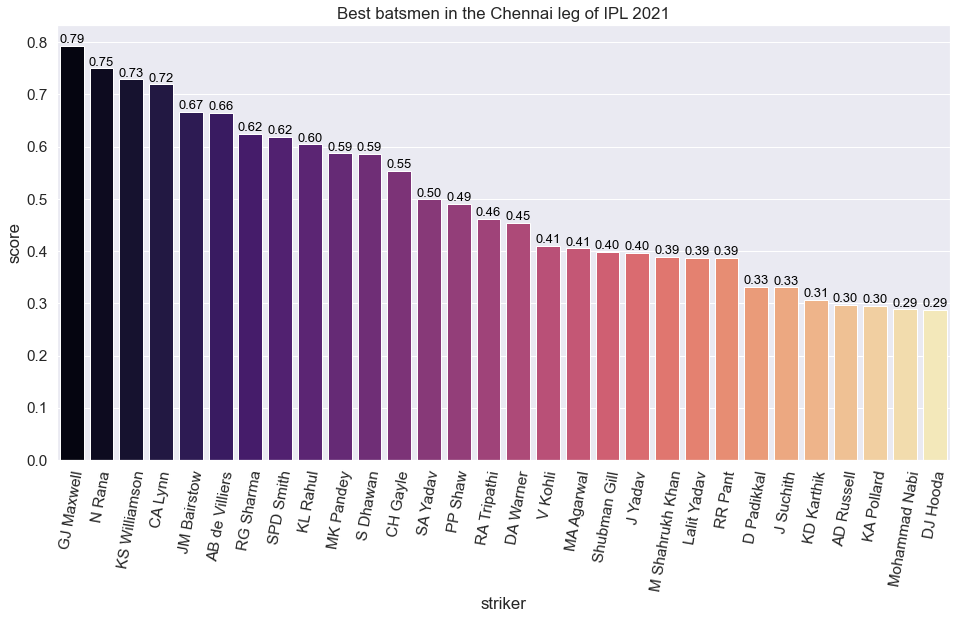

In [321]:
plt.figure(figsize=(16,8))
sns.set(font_scale=1.4)
# sns.set_style('darkgrid')
graph = sns.barplot(x=best_batsmen_in_Chepauk_2021.head(30).index, y='score', palette='magma', data=best_batsmen_in_Chepauk_2021.head(30))
# plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., title='Average', shadow=True)
plt.title("Best batsmen in the Chennai leg of IPL 2021")
plt.xticks(rotation=80);

for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=13)

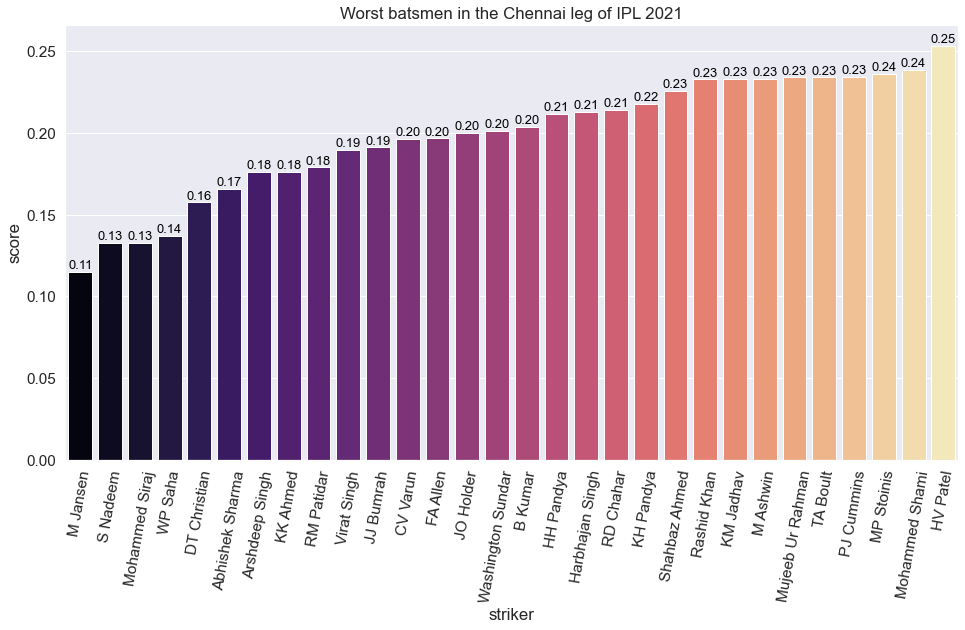

In [327]:
plt.figure(figsize=(16,8))
sns.set(font_scale=1.4)
# sns.set_style('darkgrid')
graph = sns.barplot(x=best_batsmen_in_Chepauk_2021.tail(30).sort_values(by='score', ascending=True).index, y='score', palette='magma', data=best_batsmen_in_Chepauk_2021.tail(30).sort_values(by='score',ascending=True))
# plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., title='Average', shadow=True)
plt.title("Worst batsmen in the Chennai leg of IPL 2021")
plt.xticks(rotation=80);

for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=13)

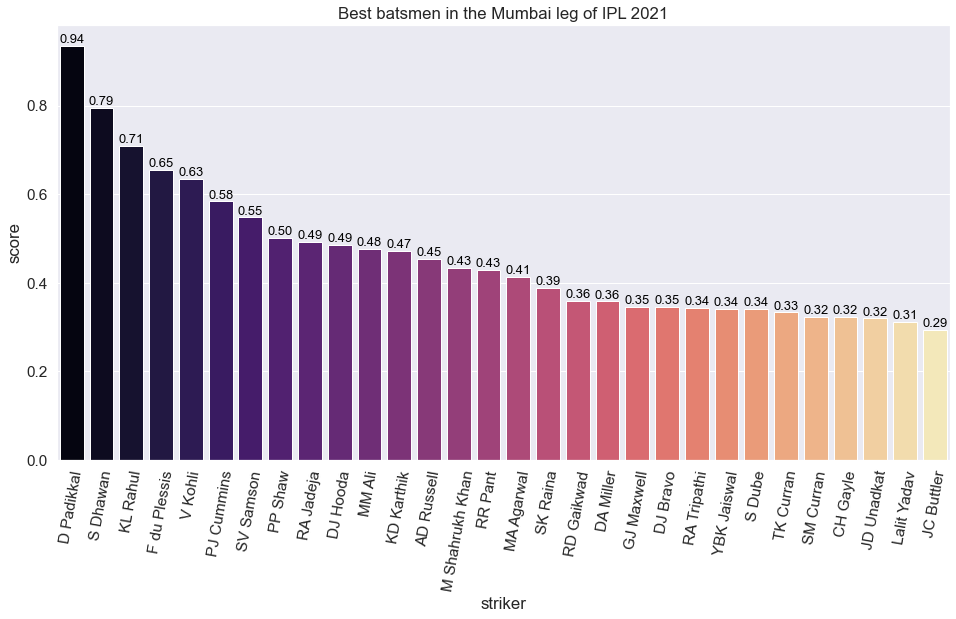

In [322]:
plt.figure(figsize=(16,8))
sns.set(font_scale=1.4)
# sns.set_style('darkgrid')
graph = sns.barplot(x=best_batsmen_in_Wankhede_2021.head(30).index, y='score', palette='magma', data=best_batsmen_in_Wankhede_2021.head(30))
# plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., title='Average', shadow=True)
plt.title("Best batsmen in the Mumbai leg of IPL 2021")
plt.xticks(rotation=80);

for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=13)

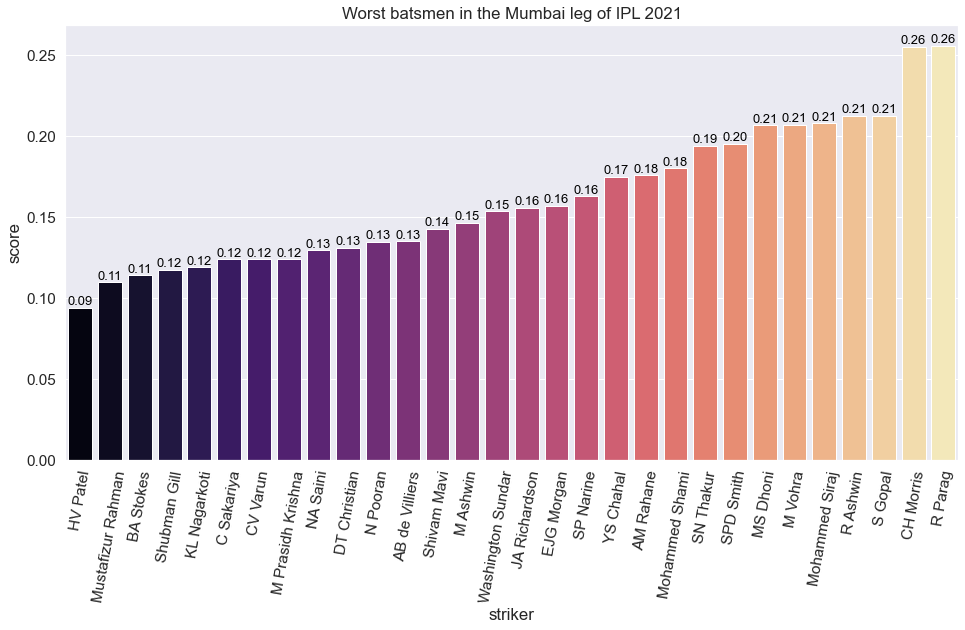

In [328]:
plt.figure(figsize=(16,8))
sns.set(font_scale=1.4)
# sns.set_style('darkgrid')
graph = sns.barplot(x=best_batsmen_in_Wankhede_2021.tail(30).sort_values(by='score', ascending=True).index, y='score', palette='magma', data=best_batsmen_in_Wankhede_2021.tail(30).sort_values(by='score',ascending=True))
# plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., title='Average', shadow=True)
plt.title("Worst batsmen in the Mumbai leg of IPL 2021")
plt.xticks(rotation=80);

for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=13)

In [338]:
best_batsmen_in_Chepauk_2021.head(50)

,score
striker,
GJ Maxwell,0.793034
N Rana,0.749776
KS Williamson,0.728776
CA Lynn,0.719258
JM Bairstow,0.666724
AB de Villiers,0.664577
RG Sharma,0.623603
SPD Smith,0.618466
KL Rahul,0.604399


In [337]:
Wankhede_2021

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,player_dismissed,other_wicket_type,other_player_dismissed,Over Number,Ball Number,isDot,isOne,isFour,isSix,isBoundary
193867,1254059,2021,2021-04-10,"Wankhede Stadium, Mumbai",1,0.1,Chennai Super Kings,Delhi Capitals,RD Gaikwad,F du Plessis,...,NaN,NaN,NaN,1,1,1,0,0,0,0
193868,1254059,2021,2021-04-10,"Wankhede Stadium, Mumbai",1,0.2,Chennai Super Kings,Delhi Capitals,RD Gaikwad,F du Plessis,...,NaN,NaN,NaN,1,2,1,0,0,0,0
193869,1254059,2021,2021-04-10,"Wankhede Stadium, Mumbai",1,0.3,Chennai Super Kings,Delhi Capitals,RD Gaikwad,F du Plessis,...,NaN,NaN,NaN,1,3,0,0,1,0,1
193870,1254059,2021,2021-04-10,"Wankhede Stadium, Mumbai",1,0.4,Chennai Super Kings,Delhi Capitals,RD Gaikwad,F du Plessis,...,NaN,NaN,NaN,1,4,1,0,0,0,0
193871,1254059,2021,2021-04-10,"Wankhede Stadium, Mumbai",1,0.5,Chennai Super Kings,Delhi Capitals,F du Plessis,RD Gaikwad,...,NaN,NaN,NaN,1,5,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198240,1254076,2021,2021-04-25,"Wankhede Stadium, Mumbai",2,19.2,Royal Challengers Bangalore,Chennai Super Kings,Mohammed Siraj,YS Chahal,...,NaN,NaN,NaN,20,2,0,0,0,1,1
198241,1254076,2021,2021-04-25,"Wankhede Stadium, Mumbai",2,19.3,Royal Challengers Bangalore,Chennai Super Kings,Mohammed Siraj,YS Chahal,...,NaN,NaN,NaN,20,3,0,0,0,0,0
198242,1254076,2021,2021-04-25,"Wankhede Stadium, Mumbai",2,19.4,Royal Challengers Bangalore,Chennai Super Kings,Mohammed Siraj,YS Chahal,...,NaN,NaN,NaN,20,4,0,1,0,0,0
198243,1254076,2021,2021-04-25,"Wankhede Stadium, Mumbai",2,19.5,Royal Challengers Bangalore,Chennai Super Kings,YS Chahal,Mohammed Siraj,...,NaN,NaN,NaN,20,5,0,1,0,0,0
